In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.neural_network
import sklearn.model_selection
import pandas as pd

In [2]:
data = pd.read_csv('data.csv')

# Descripción del Data Set
Conjunto de 5 diferentes resultados para determinar si un paciente tiene o no un grado determinado de epilepsia.

In [3]:
data.keys()

Index(['Unnamed: 0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       ...
       'X170', 'X171', 'X172', 'X173', 'X174', 'X175', 'X176', 'X177', 'X178',
       'y'],
      dtype='object', length=180)

In [4]:
Y=data['y']

In [5]:
data=data.drop('y',axis=1)
data=data.drop('Unnamed: 0',axis=1)

In [6]:
predictors=data.keys()
n = len(data[predictors])
X = np.array(data[predictors]).reshape((n, -1))

In [7]:
print(np.shape(X),np.shape(Y))

(11500, 178) (11500,)


In [8]:
scaler = StandardScaler()
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.5)
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [81]:
mlp = sklearn.neural_network.MLPClassifier(activation='relu', 
                                           hidden_layer_sizes=(4,4,4), 
                                           max_iter=1300)

In [92]:
print(len(x_train),len(x_test))

5750 5750


In [93]:
n = len(x_train)*np.arange(1,11)/10

# Aumento de 10% en la cantidad de datos para el fit

In [100]:
f1_train=[]
f1_test=[]
for i in n:
    i=np.int(i)
    mlp.fit(x_train[:i], y_train[:i])
    f1_test.append(sklearn.metrics.f1_score(y_test[:i], mlp.predict(x_test[:i]), average='macro'))
    f1_train.append(sklearn.metrics.f1_score(y_train[:i], mlp.predict(x_train[:i]), average='macro'))

In [101]:
mlp_soft = sklearn.neural_network.MLPClassifier(activation='logistic', 
                                           hidden_layer_sizes=(4,4,4), 
                                           max_iter=4000)

In [102]:
f1_train_soft=[]
f1_test_soft=[]
for i in n:
    i=np.int(i)
    mlp_soft.fit(x_train[:i], y_train[:i])
    f1_test_soft.append(sklearn.metrics.f1_score(y_test[:i], mlp_soft.predict(x_test[:i]), average='macro'))
    f1_train_soft.append(sklearn.metrics.f1_score(y_train[:i], mlp_soft.predict(x_train[:i]), average='macro'))

Text(0, 0.5, 'F1 score')

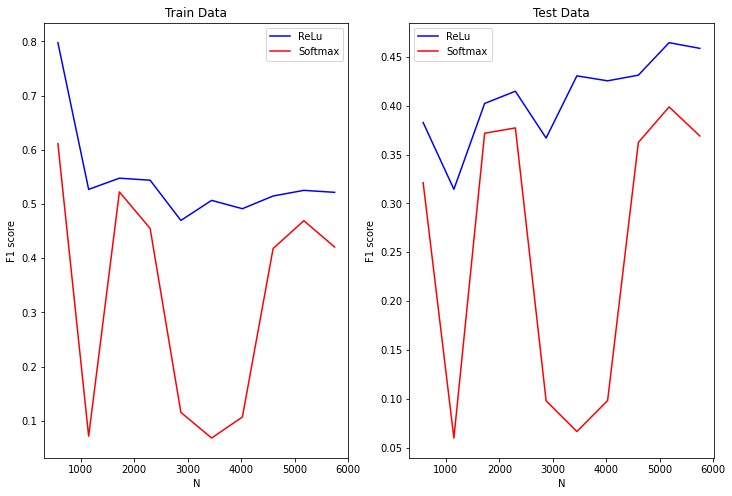

In [111]:
plt.figure(figsize=(12,8))
plt.subplot(121)
plt.title('Train Data')
plt.plot(n,f1_train,label='ReLu',color='blue')
plt.plot(n,f1_train_soft,label='Softmax',color='red')
plt.legend(loc=0.0)
plt.xlabel('N')
plt.ylabel('F1 score')
plt.subplot(122)
plt.title('Test Data')
plt.plot(n,f1_test,label='ReLu',color='blue')
plt.plot(n,f1_test_soft,label='Softmax',color='red')
plt.legend(loc=0.0)
plt.xlabel('N')
plt.ylabel('F1 score')

# Cambio en el alpha para Activación ReLu

In [72]:
alpha=np.logspace(-5,0,10)
f1_alpha_train=[]
f1_alpha_test=[]
for i in alpha:
    mlp_1 = sklearn.neural_network.MLPClassifier(activation='relu', 
                                           hidden_layer_sizes=(4,4,4), 
                                           max_iter=1200,alpha=i)
    mlp_1.fit(x_train,y_train)
    f1_alpha_test.append(sklearn.metrics.f1_score(y_test, mlp_1.predict(x_test), average='macro'))
    f1_alpha_train.append(sklearn.metrics.f1_score(y_train, mlp_1.predict(x_train), average='macro'))

Text(0.5, 0, '$\\alpha$')

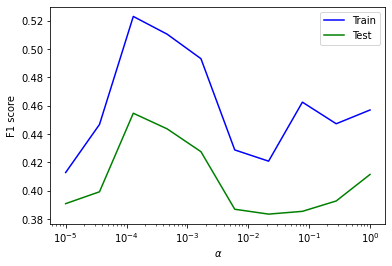

In [113]:
plt.plot(alpha,f1_alpha_train,color='blue',label='Train')
plt.plot(alpha,f1_alpha_test,color='green',label='Test')
plt.xscale('log')
plt.legend(loc=0.0)
plt.ylabel('F1 score')
plt.xlabel(r'$\alpha$')